# Personal Loans Predictive Modelling Using Machine Learning Techniques 🏦 💰 💸

## Imports

In [7]:
import scipy.stats as stats 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import statsmodels.api as sm

In [8]:
#--Sklearn library--
# Sklearn package's randomized data splitting function
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV #for choosing best parameters
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay #to plot confusion matric
from sklearn.metrics import plot_confusion_matrix

from sklearn.svm import SVC#to build the model
from sklearn.tree import DecisionTreeClassifier #to build the model
from sklearn.ensemble import RandomForestClassifier#to build the model
from sklearn.ensemble import GradientBoostingClassifier#to build the model
from sklearn.neural_network import MLPClassifier#to build the model
from imblearn.over_sampling import SMOTE #handling immbalance data

In [9]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
# To supress numerical display in scientific notations
warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
plt.style.use('ggplot')

## Data Collection

In [10]:
# read the data using pd.read_csv and converting it to dataframe 
data = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.90000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50000,2,0,0,0,0,1,0


## Data Prepocessing

In [11]:
data.shape

(5000, 14)

In [12]:
data.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1


In [13]:
data.tail(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.90000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80000,1,0,0,0,0,1,1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [15]:
data.rename(columns={"ZIP Code":"ZIP_Code","Personal Loan":"Personal_Loan","Securities Account":"Securities_Account","CD Account":'CD_Account'},inplace=True)
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [16]:
data.drop(['ID','ZIP_Code'],axis=1,inplace=True) #droping id & zip code

In [17]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [18]:
# converting categorical varaible to category type
category_col = ['Personal_Loan', 'Securities_Account','Family', 'CD_Account', 'Online', 'CreditCard', 'Education']
data[category_col] = data[category_col].astype('category')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   Family              5000 non-null   category
 4   CCAvg               5000 non-null   float64 
 5   Education           5000 non-null   category
 6   Mortgage            5000 non-null   int64   
 7   Personal_Loan       5000 non-null   category
 8   Securities_Account  5000 non-null   category
 9   CD_Account          5000 non-null   category
 10  Online              5000 non-null   category
 11  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(4)
memory usage: 230.6 KB


In [20]:
data.describe()

,Age,Experience,Income,CCAvg,Mortgage
count,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000
mean,45.33840,20.10460,73.77420,1.93794,56.49880
std,11.46317,11.46795,46.03373,1.74766,101.71380
min,23.00000,-3.00000,8.00000,0.00000,0.00000
25%,35.00000,10.00000,39.00000,0.70000,0.00000
50%,45.00000,20.00000,64.00000,1.50000,0.00000
75%,55.00000,30.00000,98.00000,2.50000,101.00000
max,67.00000,43.00000,224.00000,10.00000,635.00000


In [21]:
'in Experience columns there are negative values (-3) which should not to be cause there is no negative experience:)'

'in Experience columns there are negative values (-3) which should not to be cause there is no negative experience:)'

In [22]:
data['Experience'][data['Experience'] < 0] = data['Experience'].mean()
data.describe()


,Age,Experience,Income,CCAvg,Mortgage
count,5000.00000,5000.00000,5000.00000,5000.00000,5000.00000
mean,45.33840,20.32869,73.77420,1.93794,56.49880
std,11.46317,11.25301,46.03373,1.74766,101.71380
min,23.00000,0.00000,8.00000,0.00000,0.00000
25%,35.00000,11.00000,39.00000,0.70000,0.00000
50%,45.00000,20.10460,64.00000,1.50000,0.00000
75%,55.00000,30.00000,98.00000,2.50000,101.00000
max,67.00000,43.00000,224.00000,10.00000,635.00000


In [23]:
' CCAvg is the average spending on credit cards per month & the Income is per year so we have to convert one to another.'

' CCAvg is the average spending on credit cards per month & the Income is per year so we have to convert one to another.'

In [24]:
data['ann_CC'] = data['CCAvg'] * 12
data.drop('CCAvg', axis = 1, inplace = True)

In [25]:
df_loan = data

In [26]:
df = pd.get_dummies(data[['Family','Education']])#dummy catigorical fields
data = pd.concat([data, df], axis=1)
data.drop(['Family','Education'],axis=1,inplace=True)
data.columns

Index(['Age', 'Experience', 'Income', 'Mortgage', 'Personal_Loan',
       'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ann_CC',
       'Family_1', 'Family_2', 'Family_3', 'Family_4', 'Education_1',
       'Education_2', 'Education_3'],
      dtype='object')

## Spliting the data into training and test set in the ratio of 80:20

In [27]:
X = data.drop('Personal_Loan', axis = 1).values #splitting dataset 80:20
y = data['Personal_Loan'].values.reshape((-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## EDA

<function matplotlib.pyplot.show(close=None, block=None)>

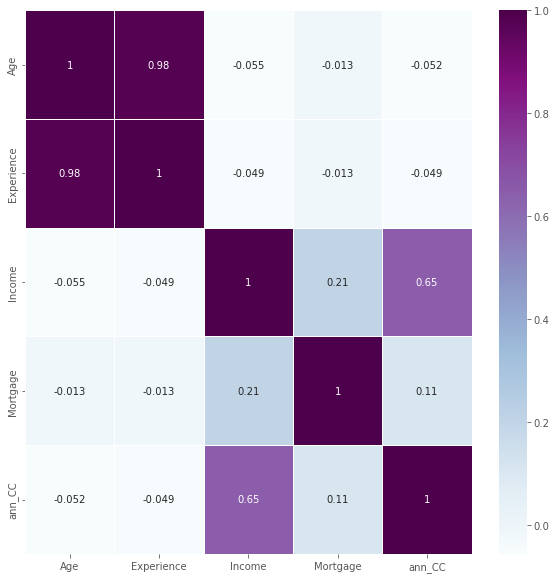

In [28]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(df_loan.corr(),cmap='BuPu',cbar=True,annot=True,linewidths=0.8)
plt.show

In [29]:
data.drop(['Experience'],axis=1,inplace=True)

In [30]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
     # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

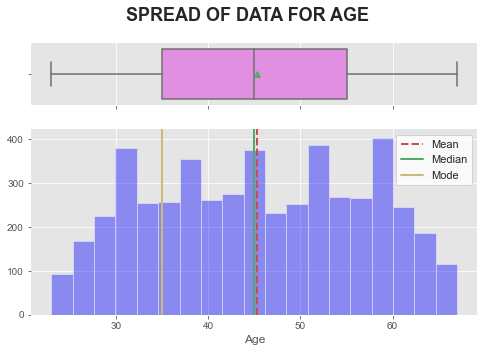

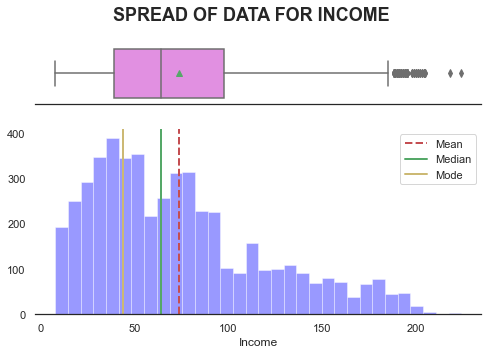

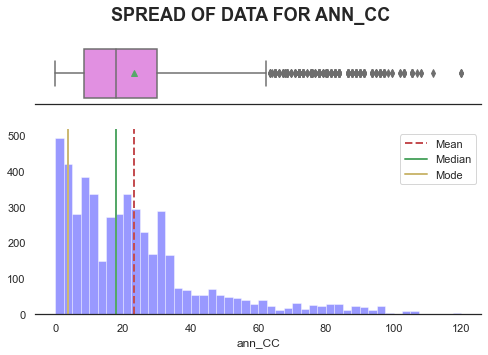

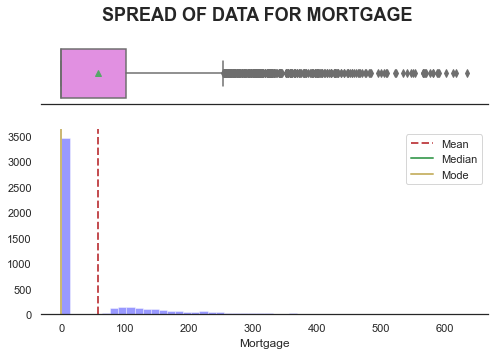

In [31]:
#select all quantitative columns for checking the spread
list_col=  ['Age','Income','ann_CC','Mortgage']
for i in range(len(list_col)):
    dist_box(data[list_col[i]])

In [32]:
data["Personal_Loan"].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

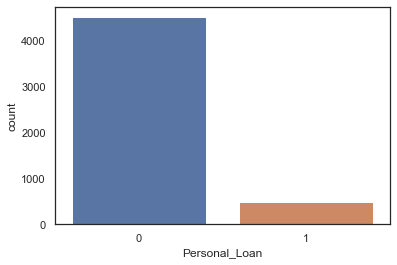

In [40]:
#checking class skewness (data imbalance)
p = sns.countplot(x=data['Personal_Loan'])

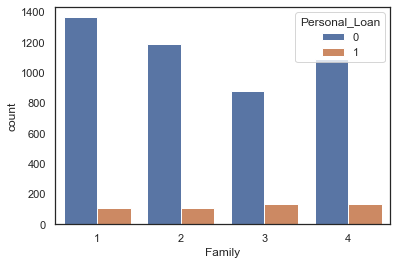

In [29]:
sns.countplot(x='Family', hue = 'Personal_Loan', data = df_loan);

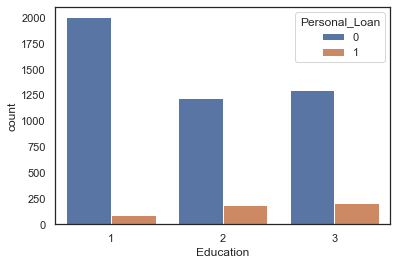

In [30]:
sns.countplot(x='Education', hue = 'Personal_Loan', data = df_loan);

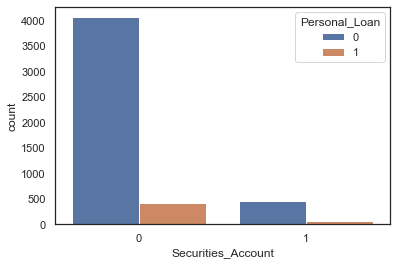

In [31]:
sns.countplot(x='Securities_Account', hue = 'Personal_Loan', data = df_loan);

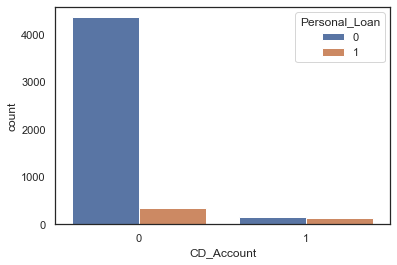

In [32]:
sns.countplot(x='CD_Account', hue = 'Personal_Loan', data = df_loan);

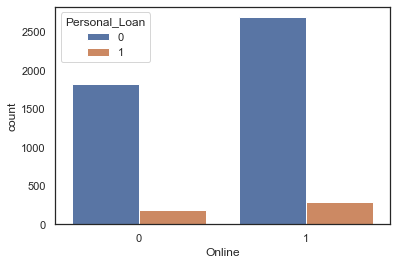

In [33]:
sns.countplot(x='Online', hue = 'Personal_Loan', data = df_loan);

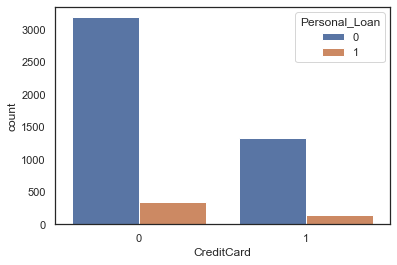

In [34]:
sns.countplot(x='CreditCard', hue = 'Personal_Loan', data = df_loan);

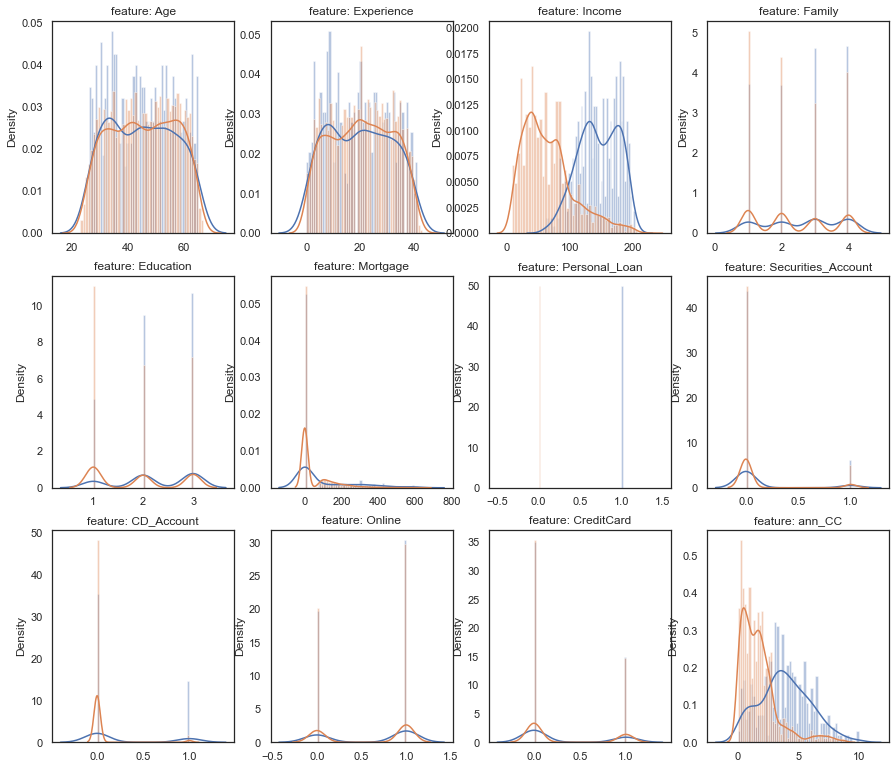

In [35]:
import matplotlib.gridspec as gridspec
v_features = df_loan.columns
plt.figure(figsize=(15,8*4))
gs = gridspec.GridSpec(7, 4)
for i, cn in enumerate(df_loan[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df_loan[cn][df_loan.Personal_Loan == 1], bins=50)
    sns.distplot(df_loan[cn][df_loan.Personal_Loan == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('feature: ' + str(cn))
plt.show()

In [62]:
conf_matrix_all = {}

def personal_loan_prediction(name, algo, training_x, testing_x, training_y, testing_y, plot) :
    algo.fit(training_x,training_y)                           # Fit the training data set to the algorithm passed.
    predictions = algo.predict(testing_x)                     # Get all predictions
    probabilities = algo.predict_proba(testing_x)             # Get probablities of predictions

    conf_matrix = confusion_matrix(testing_y, predictions)    # Get confusion matrix using the predictions
    tn, fp, fn, tp = conf_matrix.ravel()
    
    conf_matrix_all[name] = conf_matrix                       # Save confusion matrix values to a dictionary
    
    print("Classification report:")                           # Print the classification report
    print(classification_report(testing_y, predictions))
  
    model_roc_auc = roc_auc_score(testing_y, predictions)           # Get the Area under the curve number
    fpr,tpr,thresholds = roc_curve(testing_y, probabilities[:,1])   # Get False postive rate and true positive rate
    
    print ("Area under the curve: ", model_roc_auc)
    
    
    if plot:
        fig, axes = plt.subplots(1,2, figsize=(20, 7))
        conf_matrix = np.flip(conf_matrix)
        
        labels = np.array([['\nTP','\nFN'],['\nFP','\nTN']])
        labels = np.core.defchararray.add(conf_matrix.astype(str), labels)
        sns.heatmap(conf_matrix, fmt='', annot = labels, ax=axes[0], cmap="YlGnBu", xticklabels=[1, 0], yticklabels=[1, 0]);                                           # Plot the confusion matrix
        axes[0].set(xlabel='Predicted', ylabel='Actual')

        plt.title('Receiver Operating Characteristic')
        sns.lineplot(fpr, tpr, ax=axes[1])                                         # Plot the ROC curve
        plt.plot([0, 1], [0, 1],'--')                                              # Plot the diagonal line
        axes[1].set_xlim([0, 1])                                                   # Set x-axis limit to 0 and 1
        axes[1].set_ylim([0, 1])                                                   # Set y-axis limit to 0 and 1
        axes[1].set(xlabel = 'False Positive Rate', ylabel = 'True Positive Rate');
        plt.show();

In [63]:
def evalution(model,X_train, X_test, y_train, y_test ): #for evaluating the model
    print("Training Accuracy :\t ",model.score(X_train, y_train))
    print("Testing Accuracy :\t  ",  model.score(X_test, y_test))
    y_pred = model.predict(X_test)
    r=recall_score( y_test,y_pred)
    print("recall Accuracy :\t  ", r )
    print('Confusion matrix:\n ', confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    return r


#Algorithm

## Support Vector Machine

In [58]:
from sklearn import svm

prams= {'kernel':['linear', 'poly']}
svc=SVC()
clf = GridSearchCV(svc, prams,scoring='recall',cv=5)
clf.fit(X_train,y_train)
print(clf.best_params_)
print(clf.best_score_)

In [84]:

prams= {'kernel':['linear'], 'gamma':('scale', 'auto'), 'C': [1,10]}
svc=SVC()
clf = GridSearchCV(svc, prams,scoring='recall',cv=5)
clf.fit(X_train,y_train)
print(clf.best_params_)
print(clf.best_score_)

{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
0.658974358974359


In [59]:
str(type(svm).__name__)

'module'

Training Accuracy :	  0.96275
Testing Accuracy :	   0.966
recall Accuracy :	   0.6777777777777778
Confusion matrix:
  [[905   5]
 [ 29  61]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       910
           1       0.92      0.68      0.78        90

    accuracy                           0.97      1000
   macro avg       0.95      0.84      0.88      1000
weighted avg       0.96      0.97      0.96      1000

Classification report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       910
           1       0.92      0.68      0.78        90

    accuracy                           0.97      1000
   macro avg       0.95      0.84      0.88      1000
weighted avg       0.96      0.97      0.96      1000

Area under the curve:  0.8361416361416362


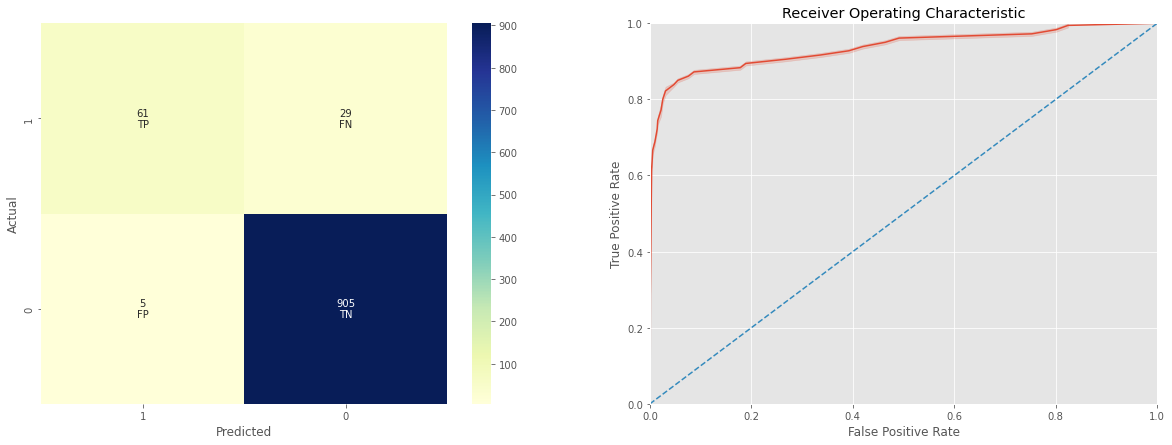

In [64]:
svm= SVC(kernel = 'linear',C= 5, gamma= 'scale', random_state = 0,probability=True)
svm.fit(X_train,y_train)
evalution (svm,X_train, X_test, y_train, y_test )
personal_loan_prediction("SVM", svm, X_train, X_test, y_train, y_test, plot = True)

## Decision Tree Classifier

In [23]:
from sklearn.model_selection import GridSearchCV

prams= {'criterion':['gini', 'entropy','log_loss'], 'max_depth':[2,4,6,8,10,20],'splitter':['best', 'random']}
dt=DecisionTreeClassifier()
clf = GridSearchCV(dt, prams,scoring='recall',cv=5)
clf.fit(X_train,y_train)
print(clf.best_params_)
print(clf.best_score_)

{'criterion': 'gini', 'max_depth': 20, 'splitter': 'best'}
0.9102564102564102


Training Accuracy :	  1.0
Testing Accuracy :	   0.979
recall Accuracy :	   0.9
Confusion matrix:
  [[898  12]
 [  9  81]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       910
           1       0.87      0.90      0.89        90

    accuracy                           0.98      1000
   macro avg       0.93      0.94      0.94      1000
weighted avg       0.98      0.98      0.98      1000

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       910
           1       0.87      0.90      0.89        90

    accuracy                           0.98      1000
   macro avg       0.93      0.94      0.94      1000
weighted avg       0.98      0.98      0.98      1000

Area under the curve:  0.9434065934065935


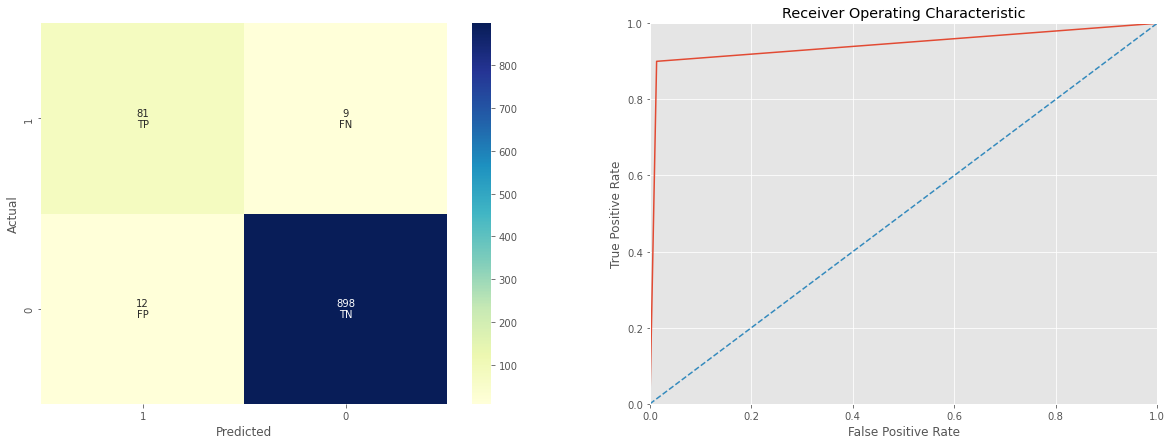

In [65]:
dt  = DecisionTreeClassifier(criterion='gini', max_depth=20, splitter='best', random_state=0)
dt.fit(X_train,y_train)
evalution (dt,X_train, X_test, y_train, y_test )
personal_loan_prediction("Decision Tree", dt, X_train, X_test, y_train, y_test, plot = True)

## Random Forest Classifier


In [44]:
from sklearn.model_selection import GridSearchCV

prams= {'criterion':['gini', 'entropy'], 'n_estimators':[10,20,40,50,100,200], 'max_depth':[2,4,6,8,10,20]}
rd=RandomForestClassifier()
clf = GridSearchCV(rd, prams,scoring='recall',cv=5)
clf.fit(X_train,y_train)
print(clf.best_params_)
print(clf.best_score_)

{'criterion': 'gini', 'max_depth': 20, 'n_estimators': 100}
0.9051282051282052


Training Accuracy :	  1.0
Testing Accuracy :	   0.988
recall Accuracy :	   0.9111111111111111
Confusion matrix:
  [[906   4]
 [  8  82]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       910
           1       0.95      0.91      0.93        90

    accuracy                           0.99      1000
   macro avg       0.97      0.95      0.96      1000
weighted avg       0.99      0.99      0.99      1000

Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       910
           1       0.95      0.91      0.93        90

    accuracy                           0.99      1000
   macro avg       0.97      0.95      0.96      1000
weighted avg       0.99      0.99      0.99      1000

Area under the curve:  0.9533577533577533


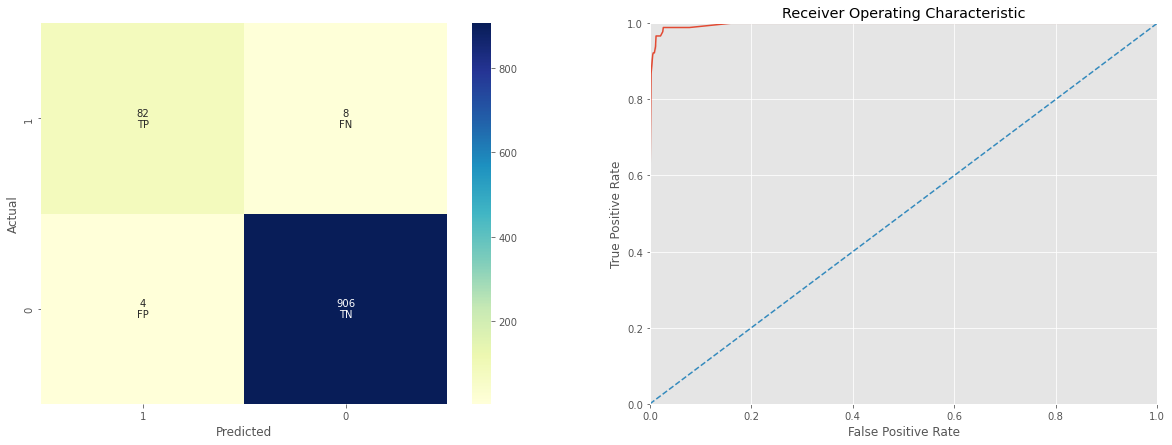

In [66]:
rd  = RandomForestClassifier(n_estimators=40, criterion='entropy', max_depth=20, random_state = 0)
rd.fit(X_train,y_train)
evalution (rd,X_train, X_test, y_train, y_test )
personal_loan_prediction("Random Forest", rd, X_train, X_test, y_train, y_test, plot = True)

## Gradient Boosting

In [46]:
prams= {'loss':['log_loss', 'deviance', 'exponential'], 'n_estimators':[100,1000],'criterion':['friedman_mse', 'squared_error', 'mse']}
gr=GradientBoostingClassifier()
clf = GridSearchCV(gr, prams,scoring='recall',cv=5)
clf.fit(X_train,y_train)
print(clf.best_params_)
print(clf.best_score_)

{'criterion': 'friedman_mse', 'loss': 'deviance', 'n_estimators': 1000}
0.9051282051282051


Training Accuracy :	  1.0
Testing Accuracy :	   0.993
recall Accuracy :	   0.9222222222222223
Confusion matrix:
  [[910   0]
 [  7  83]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       910
           1       1.00      0.92      0.96        90

    accuracy                           0.99      1000
   macro avg       1.00      0.96      0.98      1000
weighted avg       0.99      0.99      0.99      1000

Classification report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       910
           1       1.00      0.92      0.96        90

    accuracy                           0.99      1000
   macro avg       1.00      0.96      0.98      1000
weighted avg       0.99      0.99      0.99      1000

Area under the curve:  0.9611111111111111


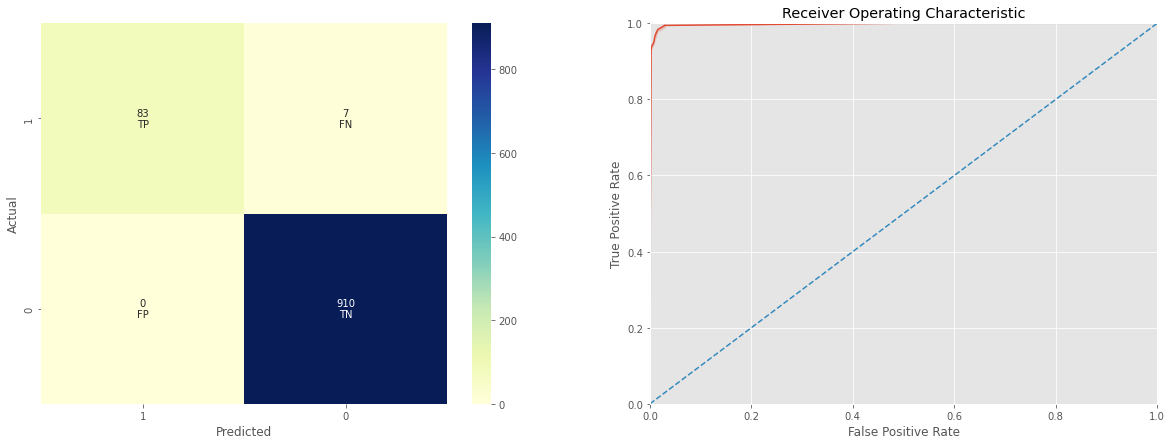

In [67]:
gr  = GradientBoostingClassifier(loss ='deviance' ,n_estimators=1000 ,criterion= 'friedman_mse', random_state=0)
gr.fit(X_train,y_train)
evalution (gr,X_train, X_test, y_train, y_test )
personal_loan_prediction("Gradient Boosting", gr, X_train, X_test, y_train, y_test, plot = True)

## Neural Network

In [71]:
prams= {'activation':['identity', 'logistic', 'tanh', 'relu'], 'batch_size':[10,1000],'hidden_layer_sizes':[10,1000],
        'solver':['lbfgs', 'sgd', 'adam'], 'learning_rate':['constant', 'invscaling', 'adaptive']}
mlp=MLPClassifier()
clf = GridSearchCV(mlp, prams,scoring='recall',cv=5)
clf.fit(X_train,y_train)
print(clf.best_params_)
print(clf.best_score_)

{'activation': 'logistic', 'batch_size': 10, 'hidden_layer_sizes': 100, 'learning_rate': 'invscaling', 'solver': 'adam'}
0.8948717948717949


In [68]:
mlp=MLPClassifier(activation='logistic',batch_size= 10,solver= 'adam', hidden_layer_sizes= 100,learning_rate= 'invscaling' ,random_state=0)
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', batch_size=10, hidden_layer_sizes=100,
              learning_rate='invscaling', random_state=0)

Training Accuracy :	  0.9855
Testing Accuracy :	   0.98
recall Accuracy :	   0.8777777777777778
Confusion matrix:
  [[901   9]
 [ 11  79]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       910
           1       0.90      0.88      0.89        90

    accuracy                           0.98      1000
   macro avg       0.94      0.93      0.94      1000
weighted avg       0.98      0.98      0.98      1000

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       910
           1       0.90      0.88      0.89        90

    accuracy                           0.98      1000
   macro avg       0.94      0.93      0.94      1000
weighted avg       0.98      0.98      0.98      1000

Area under the curve:  0.933943833943834


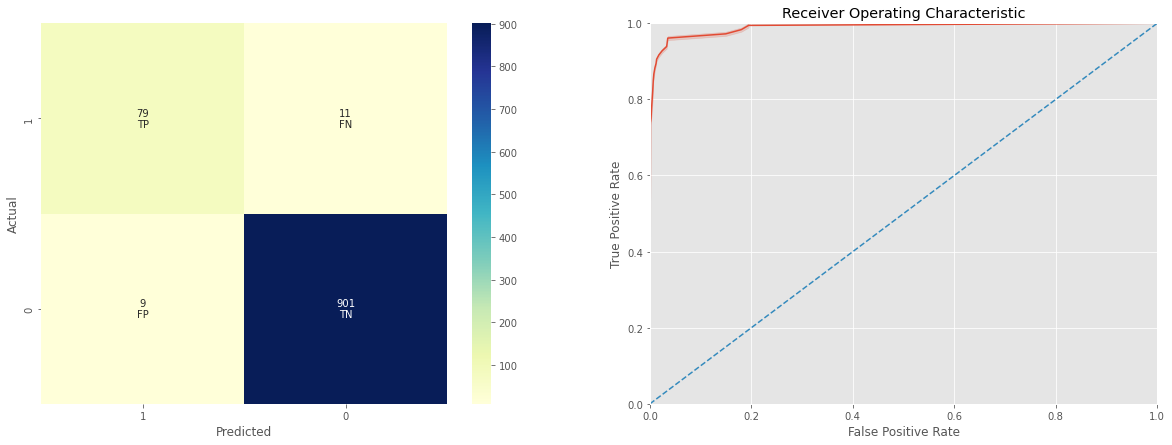

In [69]:
evalution (mlp,X_train, X_test, y_train, y_test )
personal_loan_prediction("Neural network", mlp, X_train, X_test, y_train, y_test, plot = True)

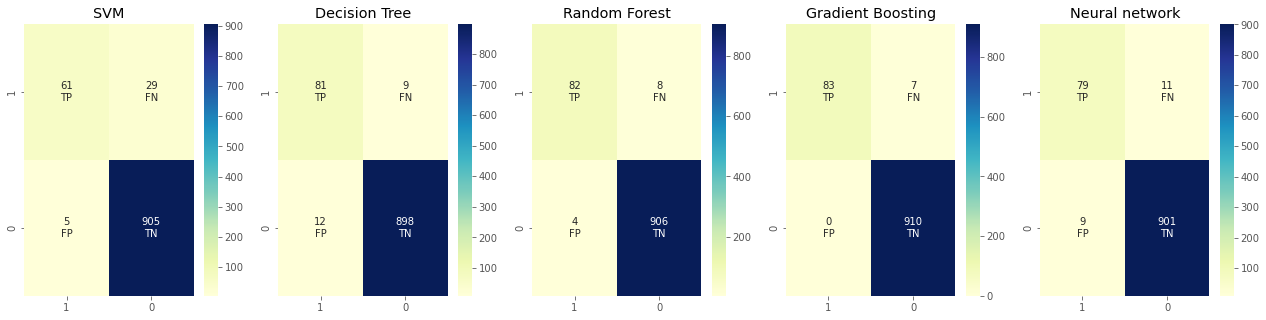

In [71]:

#Plotting the confusion matrix for all our models
import math
fig, axes = plt.subplots(1,5, figsize = (22, 5))

cnt = 0
for c in range(5):
    try:
        conf_matrix = np.flip(list(conf_matrix_all.values())[cnt])
        labels = np.array([['\nTP','\nFN'],['\nFP','\nTN']])
        labels = np.core.defchararray.add(conf_matrix.astype(str), labels)

        sns.heatmap(conf_matrix, fmt='', annot = labels, ax=axes[c], cmap="YlGnBu", xticklabels=[1, 0], yticklabels=[1, 0]);
        axes[c].set(title=list(conf_matrix_all.keys())[cnt])
        cnt += 1
    except:
        pass

## handling imbalanced in data effect

In [51]:
sm = SMOTE(random_state=1)
X_sm_train , y_sm_train = sm.fit_resample(X_train,y_train)

## Support Vector Machine Modified

In [52]:
svm= SVC(kernel = 'linear',C= 5, gamma= 'scale', random_state = 0)
svm.fit(X_sm_train,y_sm_train)

SVC(C=5, kernel='linear', random_state=0)

In [53]:
evalution (svm,X_sm_train, X_test, y_sm_train, y_test )

Training Accuracy :	  0.9216066481994459
Testing Accuracy :	   0.924
recall Accuracy :	   0.8777777777777778
Confusion matrix:
  [[845  65]
 [ 11  79]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       910
           1       0.55      0.88      0.68        90

    accuracy                           0.92      1000
   macro avg       0.77      0.90      0.82      1000
weighted avg       0.95      0.92      0.93      1000



0.8777777777777778

## Decision Tree Classifier

In [54]:
tree_class = DecisionTreeClassifier(criterion='gini', max_depth=20, splitter='best', random_state=0)
tree_class.fit(X_sm_train, y_sm_train)

DecisionTreeClassifier(max_depth=20, random_state=0)

In [55]:
evalution (tree_class,X_sm_train, X_test, y_sm_train, y_test )

Training Accuracy :	  1.0
Testing Accuracy :	   0.98
recall Accuracy :	   0.9222222222222223
Confusion matrix:
  [[897  13]
 [  7  83]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       910
           1       0.86      0.92      0.89        90

    accuracy                           0.98      1000
   macro avg       0.93      0.95      0.94      1000
weighted avg       0.98      0.98      0.98      1000



0.9222222222222223

## Random Forest Classifier


In [56]:
Random_class = RandomForestClassifier(n_estimators=40, criterion='entropy', max_depth=20, random_state = 0)
Random_class.fit(X_sm_train, y_sm_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=40,
                       random_state=0)

In [57]:
evalution (Random_class,X_sm_train, X_test, y_sm_train, y_test )

Training Accuracy :	  0.9998614958448754
Testing Accuracy :	   0.988
recall Accuracy :	   0.9111111111111111
Confusion matrix:
  [[906   4]
 [  8  82]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       910
           1       0.95      0.91      0.93        90

    accuracy                           0.99      1000
   macro avg       0.97      0.95      0.96      1000
weighted avg       0.99      0.99      0.99      1000



0.9111111111111111

## Gradient Boosting

In [58]:
gr  = GradientBoostingClassifier(loss ='deviance' ,n_estimators=1000 ,criterion= 'friedman_mse', random_state=0)
gr.fit(X_sm_train, y_sm_train)


GradientBoostingClassifier(n_estimators=1000, random_state=0)

In [62]:
evalution (gr,X_sm_train, X_test, y_sm_train, y_test)

Training Accuracy :	  1.0
Testing Accuracy :	   0.99
recall Accuracy :	   0.9333333333333333
Confusion matrix:
  [[906   4]
 [  6  84]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       910
           1       0.95      0.93      0.94        90

    accuracy                           0.99      1000
   macro avg       0.97      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000



0.9333333333333333

## Neural Network

In [77]:
mlp=MLPClassifier(activation='logistic',batch_size= 100,solver= 'adam' ,random_state=1, max_iter=300)
mlp.fit(X_sm_train, y_sm_train)

MLPClassifier(activation='logistic', batch_size=100, max_iter=300,
              random_state=1)

In [79]:
mlp=MLPClassifier(activation='logistic',batch_size= 10,solver= 'adam', hidden_layer_sizes= 100,learning_rate= 'invscaling' ,random_state=0)
mlp.fit(X_sm_train, y_sm_train)

MLPClassifier(random_state=0)

In [80]:
evalution (mlp,X_sm_train, X_test, y_sm_train, y_test )

Training Accuracy :	  0.9685595567867036
Testing Accuracy :	   0.97
recall Accuracy :	   0.8555555555555555
Confusion matrix:
  [[893  17]
 [ 13  77]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       910
           1       0.82      0.86      0.84        90

    accuracy                           0.97      1000
   macro avg       0.90      0.92      0.91      1000
weighted avg       0.97      0.97      0.97      1000



0.8555555555555555